In [2]:
!pip install networkx
!pip install scipy

root


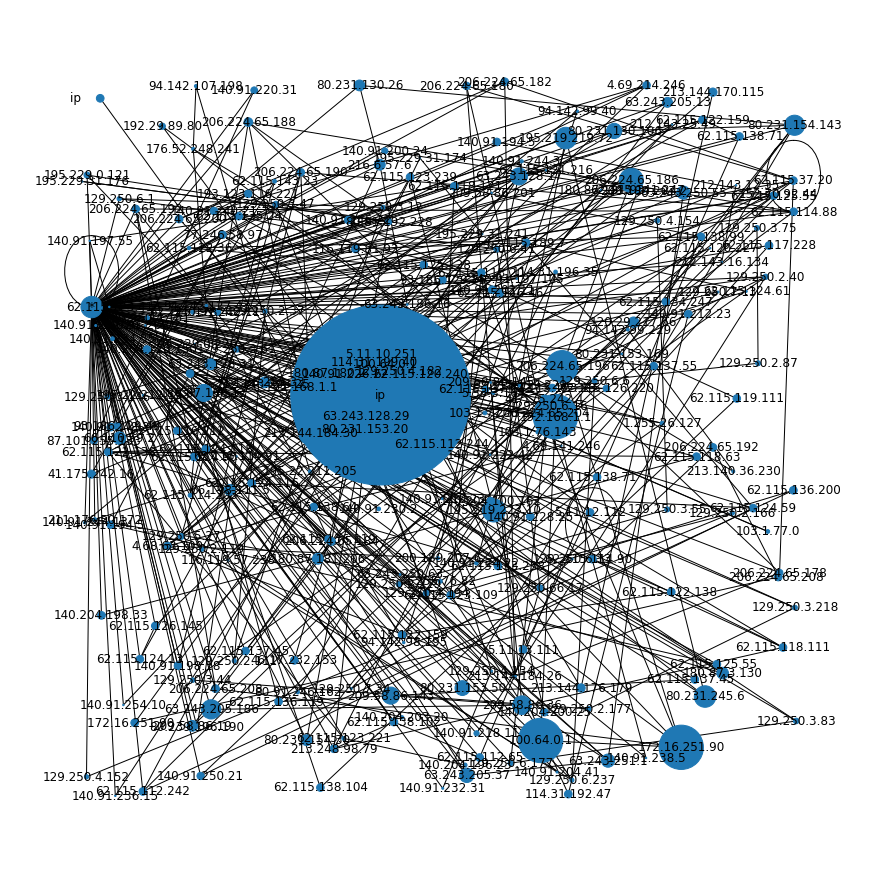

In [3]:
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt
import pprint 
# Create an empty graph and add nodes with IPs and sizes
G = nx.Graph()
# with open("dict.csv", newline='') as csvfile:
#     reader = csv.reader(csvfile)
#     for row in reader:
#         ip=row[0]
#         G.add_node(ip)

# nx.spring_layout(G)
plt.figure(3,figsize=(12,12)) 
l={}
base="/root/idp-castellotti-data/regions-oracle-traceroute/"
for file in os.listdir(base):
    filename = os.fsdecode(file)
    if "starlink" in filename and "ICMP" in filename:
        with open(base+filename,"r") as csvfile:
            d=list(csv.reader(csvfile))
            for r in range(len(d)-1):
#                 if d[r][2]!="ip" and d[r][2]!="*" and d[r+1][2]!="*":
                ip1=d[r][2]
                ip2=d[r+1][2]
                if ip1 not in l:
                    l[ip1]=1
                l[ip1]+=1

                G.add_edge(ip1,ip2)
                
sorted_l=sorted(l.items(), key=lambda item: item[1],reverse=True)

# Create a list of sizes for each node based on their size attribute
node_sizes = [node[1] *1 for node in sorted_l]
# G.remove_node(0)
nx.draw_random(G,node_size=node_sizes, with_labels=True, cmap=plt.cm.Blues)
# Show the graph



In [4]:
# G = nx.Graph()
# siz=[]
# ipz=[]
# with open("dict.csv", newline='') as csvfile:
#     reader = csv.reader(csvfile)
#     for row in reader:
#         ip=row[0]
#         size=row[1]
#         siz.append(size)
#         ipz.append(ip)
# print(len(ipz))
# print(len(siz))
# plt.figure(3,figsize=(12,12)) 
# G.add_nodes_from(ipz)
# print(len(G.nodes()))
# nx.draw_random(G,node_size=siz)